In [75]:
import pandas as pd
import altair as alt
import pycountry
import pytz
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import random
import seaborn as sns
pd.options.display.max_rows = 4000

### Importing Profile Info

In [2]:
profile = pd.read_csv("Datasets/kaggle-last.fm/userid-profile.csv", names=['user_id', 'gender', 'age', 'country', 'registered'])

In [3]:
profile = profile.dropna(subset=['country'])
profile = profile.reset_index()
profile = profile.drop('index', axis=1)
profile = profile.iloc[1: , :]

In [4]:
mapping = {country.name: country.alpha_2 for country in pycountry.countries}
country_code = []

for name in profile['country']:
    country_code.append(mapping.get(name))

In [5]:
profile['country_code'] = country_code

In [6]:
profile.head(20)

,user_id,gender,age,country,registered,country_code
1,user_000001,m,NaN,Japan,"Aug 13, 2006",JP
2,user_000002,f,NaN,Peru,"Feb 24, 2006",PE
3,user_000003,m,22,United States,"Oct 30, 2005",US
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006",BG
5,user_000006,NaN,24,Russian Federation,"May 18, 2006",RU
6,user_000007,f,NaN,United States,"Jan 22, 2006",US
7,user_000008,m,23,Slovakia,"Sep 28, 2006",SK
8,user_000009,f,19,United States,"Jan 13, 2007",US
9,user_000010,m,19,Poland,"May 4, 2006",PL
10,user_000011,m,21,Finland,"Sep 8, 2005",FI


In [7]:
profile.shape

(907, 6)

### Importing Profile SHA Info

In [8]:
profile_sha = pd.read_csv("Datasets/kaggle-last.fm/usersha1-profile.csv", names=['user_sha', 'gender', 'age', 'country', 'registered'])

In [9]:
mapping = {country.name: country.alpha_2 for country in pycountry.countries}
country_code = []

for name in profile_sha['country']:
    country_code.append(mapping.get(name))

In [10]:
profile_sha['country_code'] = country_code

In [11]:
profile_sha.head(20)

,user_sha,gender,age,country,registered,country_code
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",DE
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007",CA
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006",DE
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",MX
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",US
5,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20.0,United Kingdom,"Jan 14, 2006",GB
6,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17.0,Finland,"Nov 17, 2007",FI
7,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22.0,Poland,"May 23, 2007",PL
8,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24.0,Spain,"Nov 4, 2008",ES
9,0001399387da41d557219578fb08b12afa25ab67,m,NaN,Ukraine,"Aug 17, 2008",UA


### Importing Listening Activity

In [12]:
activity = pd.read_csv("Datasets/kaggle-last.fm/userid-timestamp-artid-artname-traid-traname.tsv", sep="\t", error_bad_lines=False, names=['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name'])

/Users/ritwiksrivastava/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
activity.shape

(19098862, 6)

### Importing Artist Plays

In [15]:
artist_plays = pd.read_csv("Datasets/kaggle-last.fm/usersha1-artmbid-artname-plays.tsv", sep="\t", error_bad_lines=False, header=None, names=['user_sha', 'artist_id', 'artist_name', 'plays'])

/Users/ritwiksrivastava/opt/anaconda3/envs/dviz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
artist_plays.shape

(17535655, 4)

In [18]:
artist_profile_joined = artist_plays.set_index('user_sha').join(profile_sha.set_index('user_sha')).drop(['age', 'gender', 'registered', 'artist_id'], axis=1)

In [19]:
artist_profile_joined.reset_index(level=0, inplace=True)

In [20]:
artist_profile_joined.head(20)

,user_sha,artist_name,plays,country,country_code
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,Germany,DE
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,Germany,DE
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,Germany,DE
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,Germany,DE
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,Germany,DE
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691,Germany,DE
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545,Germany,DE
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507,Germany,DE
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424,Germany,DE
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403,Germany,DE


In [21]:
artist_profile_joined = artist_profile_joined.dropna()

### Plotting the Number of Artist Streams per Country

In [22]:
artist_plays_per_country = artist_profile_joined.drop('user_sha', axis=1)
artist_plays_per_country['total'] = artist_plays_per_country.groupby(['artist_name', 'country'])['plays'].transform('sum')
artist_plays_per_country = artist_plays_per_country.drop_duplicates(subset=['artist_name', 'country'])

In [23]:
artist_plays_per_country = artist_plays_per_country.reset_index()

In [24]:
artist_plays_per_country = artist_plays_per_country.drop('index', axis=1)

In [26]:
import plotly.express as px

In [229]:
temp = artist_plays_per_country[artist_plays_per_country['artist_name'].isin(['betty blowtorch'])]

In [231]:
fig = px.choropleth(temp, locations='country', color='total',
                           hover_name='country', locationmode='country names'
                          )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Creating a Listening Clock

In [42]:
activity_profile_joined = activity.set_index('user_id').join(profile.set_index('user_id'))

In [43]:
activity_profile_joined.head(20)

,timestamp,artist_id,artist_name,track_id,track_name,gender,age,country,registered,country_code
user_id,,,,,,,,,,
user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP


In [44]:
activity_profile_joined = activity_profile_joined.reset_index()

In [45]:
activity_profile_joined.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name,gender,age,country,registered,country_code
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,m,NaN,Japan,"Aug 13, 2006",JP
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),m,NaN,Japan,"Aug 13, 2006",JP


In [46]:
activity_profile_joined['timestamp'] = pd.to_datetime(activity_profile_joined['timestamp'])
activity_profile_joined['hour'] = activity_profile_joined.timestamp.dt.hour

In [162]:
tempp = activity_profile_joined.groupby(['artist_name']).size().reset_index(name='Counts')

In [177]:
temp = activity_profile_joined[activity_profile_joined['artist_name'].isin(['Pink Floyd'])]

In [178]:
temp = temp.reset_index()
temp = temp.drop('index', axis=1)

In [179]:
temp2 = temp.groupby(['country', 'hour']).size().reset_index(name='Counts')
temp2 = temp2[temp2['country'] == 'United States']
temp3 = temp2.drop('country', axis=1)
temp3 = temp3.reset_index()
temp3 = temp3.drop('index', axis=1)

In [223]:
temp3.head(20)

,hour,Counts
0,0,476
1,1,499
2,2,589
3,3,727
4,4,639
5,5,556
6,6,592
7,7,461
8,8,385
9,9,352


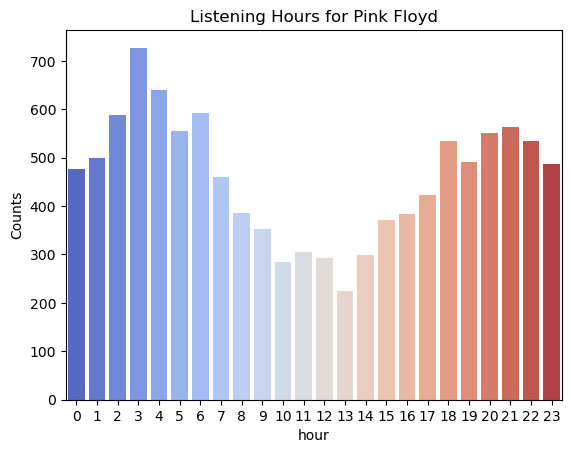

In [182]:
ax = sns.barplot(x="hour", y="Counts", data=temp3, palette="coolwarm").set_title("Listening Hours for Pink Floyd")
plt.show()